<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 연속확률변수, 연속확률분포

- $X \sim N(0,1) $, 표준정규분포

- 확률밀도함수(probability density function, pdf)

$$
f(x) = \frac{1}{\sqrt{2 \pi}}  \exp(-\frac{x^2}{2})
$$

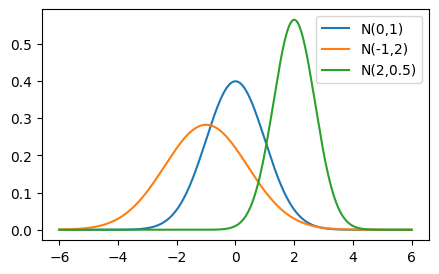

In [ ]:
# 평균 0, 표준편차 1인 표준정규분포의
# 확률밀도함수를 그릴 것임

# scipy.stats 을 사용

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-6, 6, 0.001)


y1 = norm.pdf(x, loc=0, scale=1) # loc = 평균, scale = 표준편차
# 평균 -1 이고, 분산이 2인 정규분포를 겹쳐 그려라
y2 = norm.pdf(x, loc=-1, scale=np.sqrt(2))

# 평균 2 이고, 분산은 1/2 인 정규분포
y3 = norm.pdf(x, loc=2, scale=np.sqrt(0.5))

plt.figure(figsize = (5,3) )
plt.plot(x, y1, label = "N(0,1)")
plt.plot(x, y2, label = "N(-1,2)")
plt.plot(x, y3, label = "N(2,0.5)")

plt.legend()
plt.show()




### 로그-정규분포, log-normal distribution

- $X$가 로그-정규분포를 따른다고 하면,
- $\ln (X)$ 이것이 $N(\mu, \sigma)$

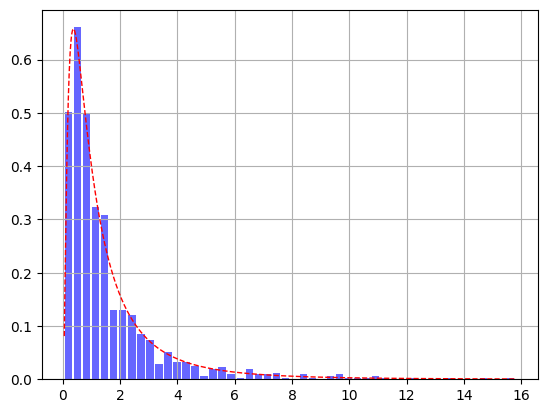

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# define parameters
mu = 0
sigma = 1

np.random.seed(0)

# random numbers from log-normal distribution
num_samples = 1000
random_numbers = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

plt.hist(random_numbers, bins=50, density=True, alpha=0.6,
         color='b', rwidth = 0.8)

# pdf of log-normal
x = np.linspace(min(random_numbers), max(random_numbers), 1000)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r--', linewidth=1)

plt.grid()
plt.show()







In [ ]:
# random_numbers 를 로그-변환해서 히스토그램



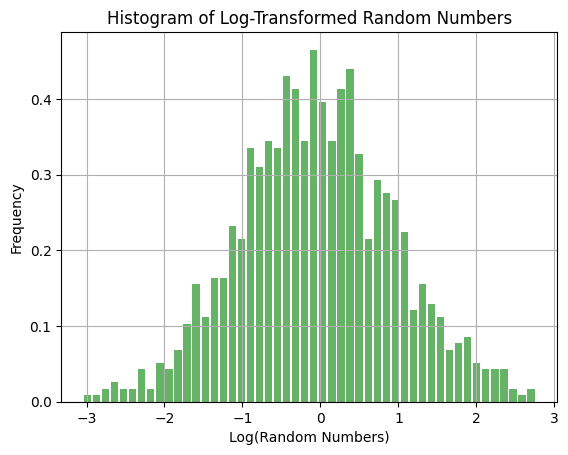

In [ ]:
# prompt: # random_numbers 를 로그-변환해서 히스토그램  그려줘

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Assuming random_numbers is already defined from the previous code
# If not, uncomment the following lines to redefine it
mu = 0
sigma = 1
np.random.seed(0)
num_samples = 1000
random_numbers = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

# Log-transform the random numbers
log_transformed_numbers = np.log(random_numbers)

# Plot the histogram of the log-transformed numbers
plt.hist(log_transformed_numbers, bins=50, density=True, alpha=0.6, color='g', rwidth=0.8)
plt.title("Histogram of Log-Transformed Random Numbers")
plt.xlabel("Log(Random Numbers)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


### 지수분포, exponential distribution

- time to failure, duration, matrurity, liquidity(유동성)

- $\lambda$ : hazard rate, 위험률, intensity(강도)

- pdf:
$$
f(t) = \lambda \exp(-\lambda t), t \geq 0
$$

- 기억력이 없음. memory-less




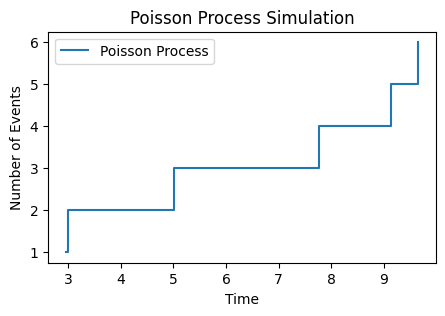

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

lambda_val = 0.5
time_end = 10

interarrival_times = np.random.exponential(scale=1/lambda_val,
                                           size=int(lambda_val*time_end*2))
arrival_times = np.cumsum(interarrival_times)
arrival_times = arrival_times[arrival_times <= time_end]

# events count
event_counts = np.arange(1, len(arrival_times)+1)

# Poisson process
plt.figure(figsize=(5, 3))
plt.step(arrival_times, event_counts, where='post', label='Poisson Process')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.title('Poisson Process Simulation')
plt.show()

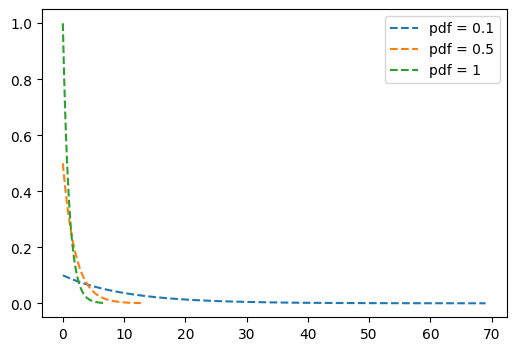

In [ ]:
# exponential distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

lambdas = [0.1, 0.5, 1]

# 히스코그램 위에 exponential 분포의 pdf 를 추가

plt.figure(figsize=(6, 4))

for i, lam in enumerate(lambdas):

    samples = np.random.exponential(scale=1/lam, size=1000)
    # # # histogram
    # plt.hist(samples, bins = 50, alpha = 0.4, rwidth = 0.7,
    #          density=True, label = f'lambda = {lam}')

    # pdf
    x = np.linspace(0, max(samples), 100)
    y = expon.pdf(x, scale=1/lam)
    plt.plot(x, y, linestyle='--', label=f'pdf = {lam}')

plt.legend()
plt.show()

### Chi-square distribution, 카이 제곱 분포

- $\chi^2 (k)$
- $k$: 자유도, degree of freedom

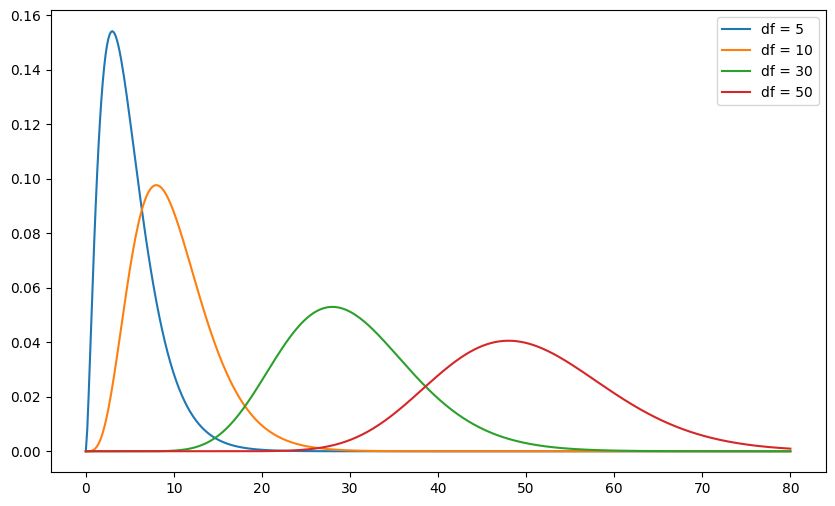

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

dfs = [5, 10, 30, 50]

x = np.linspace(0,80, 500)

plt.figure(figsize=(10,6))

for df in dfs:
    y = chi2.pdf(x, df)
    plt.plot(x, y, label=f'df = {df}')

plt.legend()
plt.show()



